## Grant Aguinaldo, HW-5 Submission

## Option 2: Pymaceuticals Inc

![Laboratory](Laboratory.jpg)

While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've since joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego, CA. Pymaceuticals specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As their Chief Data Analyst, you've been given access to the complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare.

To do this you are tasked with:

* Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
* Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.
* Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
* Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, X and Y Axis Limits, etc.
* Your scatter plots must include [error bars](https://en.wikipedia.org/wiki/Error_bar). This will allow the company to account for variability between mice. You may want to look into [`pandas.DataFrame.sem`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sem.html) for ideas on how to calculate this.
* Remember when making your plots to consider aesthetics!
  * Your legends should not be overlaid on top of any data.
  * Your bar graph should indicate tumor growth as red and tumor reduction as green.
    It should also include a label with the percentage change for each bar. You may want to consult this [tutorial](http://composition.al/blog/2015/11/29/a-better-way-to-add-labels-to-bar-charts-with-matplotlib/) for relevant code snippets.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.
* See [Example Solution](Pymaceuticals/Pymaceuticals_Example.pdf) for a reference on expected format. (Note: For this example, you are not required to match the tables or data frames included. Your only goal is to build the scatter plots and bar graphs. Consider the tables to be potential clues, but feel free to approach this problem, however, you like.)

## Hints and Considerations

* Be warned: These are very challenging tasks. Be patient with yourself as you trudge through these problems. They will take time and there is no shame in fumbling along the way. Data visualization is equal parts exploration, equal parts resolution.

* Between these two exercises, the Pymaceuticals one is significantly more challenging. So choose that one only if you feel somewhat comfortable with the material covered so far. The Pymaceuticals example _will_ require you to research a good bit on your own for hacked solutions to problems you'll experience along the way. If you end up choosing this exercise, feel encouraged to constantly refer back to Stack Overflow and the Pandas Documentation. These are needed tools in every data analyst's arsenl.

* Don't get bogged down in small details. Always focus on the big picture. If you can't figure out how to get a label to show up correctly, come back to it. Focus on getting the core skeleton of your notebook complete. You can always re-visit old problems.

* Remember: There are many ways to skin a cat, and similarly there are many ways to approach a data problem. The key throughout, however, is to break up your task into micro tasks. Try answering questions like: "How does my Data Frame need to be structured for me to have the right X and Y axis?" "How do I build a basic scatter plot?" "How do I add a label to that scatter plot?" "Where would the labels for that scatter plot come from?". Again! Don't let the magnitude of a programming task scare you off. Ultimately, every programming problem boils down to a handful of smaller, bite-sized tasks.

* Get help when you need it! There is never any shame in asking. But as always, ask a _specific_ question. You'll never get a great answer to: "I'm lost." Good luck!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import random
%matplotlib inline

In [2]:
file1 = '/Users/gta/dev/hw-5/clinicaltrial_data.csv'
file2 = '/Users/gta/dev/hw-5/mouse_drug_data.csv'

In [3]:
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

In [4]:
df1.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
combined_df = pd.merge(df1, df2, on='Mouse ID', how='outer')
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [6]:
combined_df['Drug'].unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'], dtype=object)

In [7]:
combined_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


In [8]:
combined_df.shape

(1906, 5)

### Deliverable 1:  Creating a scatter plot that shows how the tumor volume changes over time for each treatment.

In [9]:
agg_func_sem = {'Tumor Volume (mm3)': stats.sem, 'Metastatic Sites': stats.sem}

In [10]:
grouped_df_mean = combined_df.groupby(['Drug', 'Timepoint']).mean()

In [11]:
grouped_df_sem = combined_df.groupby(['Drug', 'Timepoint']).agg(agg_func_sem)

In [12]:
drug_conc_pvt_vol_mean = pd.pivot_table(combined_df, index = ['Timepoint'], 
                               columns =['Drug'], values = 'Tumor Volume (mm3)', 
                               aggfunc = np.mean)
drug_conc_pvt_vol_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [13]:
drug_conc_pvt_vol_sem = pd.pivot_table(combined_df, index = ['Timepoint'], 
                                   columns =['Drug'], values = 'Tumor Volume (mm3)', 
                                   aggfunc = stats.sem)
drug_conc_pvt_vol_sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [14]:
x_data = [drug_conc_pvt_vol_mean[num].index.tolist() for num in drug_conc_pvt_vol_mean.columns]
y_means = [drug_conc_pvt_vol_mean[num].tolist() for num in drug_conc_pvt_vol_mean.columns]
s_errors = [drug_conc_pvt_vol_sem[num].tolist() for num in drug_conc_pvt_vol_sem.columns]

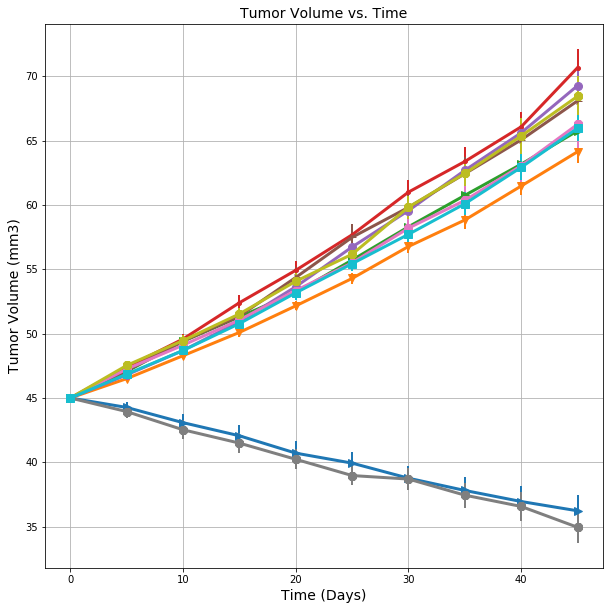

In [15]:
plt.figure(figsize=(10,10))
marker_choice = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s"]
for num in range(len(s_errors)):
    plt.errorbar(x_data[num], y_means[num], yerr = s_errors[num], 
                 marker = random.choice(marker_choice), 
                 markersize='8', elinewidth=2, linewidth = 3)
plt.grid(True)
plt.xlabel("Time (Days)", fontsize = 14)
plt.ylabel("Tumor Volume (mm3)", fontsize = 14)
plt.title("Tumor Volume vs. Time", fontsize = 14)
plt.show()

### Deliverable 2:  Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment. 2:  Creating a scatter plot that shows how the cancer spreads over time for each treatment.

In [16]:
drug_conc_pvt_spread_mean = pd.pivot_table(combined_df, index = ['Timepoint'], 
                               columns =['Drug'], values = 'Metastatic Sites', 
                               aggfunc = np.mean)
drug_conc_pvt_spread_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [17]:
drug_conc_pvt_spread_sem = pd.pivot_table(combined_df, index = ['Timepoint'], 
                               columns =['Drug'], values = 'Metastatic Sites', 
                               aggfunc = stats.sem)
drug_conc_pvt_spread_sem

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [18]:
x_data_spread = [drug_conc_pvt_spread_mean[num].index.tolist() for num in drug_conc_pvt_spread_mean.columns]
y_means_spread = [drug_conc_pvt_spread_mean[num].tolist() for num in drug_conc_pvt_spread_mean.columns]
s_errors_spread = [drug_conc_pvt_spread_sem[num].tolist() for num in drug_conc_pvt_spread_sem.columns]

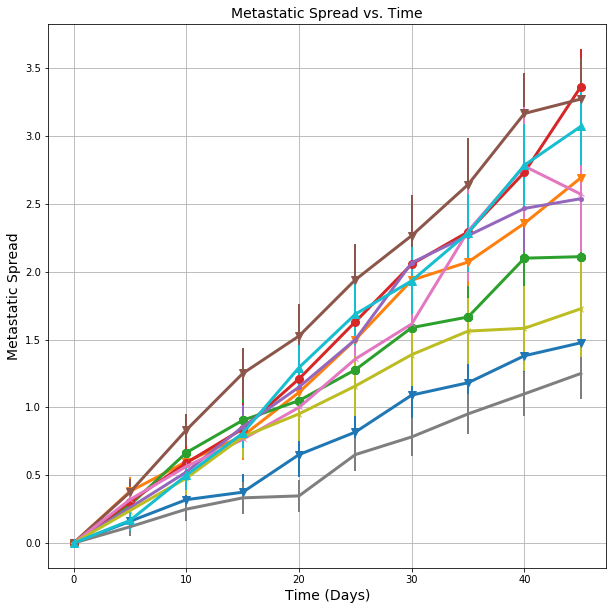

In [19]:
plt.figure(figsize=(10,10))
marker_choice = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s"]
for num in range(len(s_errors)):
    plt.errorbar(x_data_spread[num], y_means_spread[num], yerr = s_errors_spread[num], 
                 marker = random.choice(marker_choice), 
                 markersize='8', elinewidth=2, linewidth = 3)
plt.grid(True)
plt.xlabel("Time (Days)", fontsize = 14)
plt.ylabel("Metastatic Spread", fontsize = 14)
plt.title("Metastatic Spread vs. Time", fontsize = 14)
plt.show()

### Deliverable 3:  Create a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)

In [20]:
drug_conc_pvt_vol_ct = pd.pivot_table(combined_df, index = ['Timepoint'], 
                               columns =['Drug'], values = 'Metastatic Sites', 
                               aggfunc='count')
drug_conc_pvt_vol_ct

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [88]:
x_data_ct = [drug_conc_pvt_vol_ct[num].index.tolist() for num in drug_conc_pvt_vol_ct.columns]
y_ct = [drug_conc_pvt_vol_ct[num].tolist() for num in drug_conc_pvt_vol_ct.columns]
y_survival_pct = [[(num_j/max(num_i) * 100) for num_j in num_i] for num_i in y_ct]

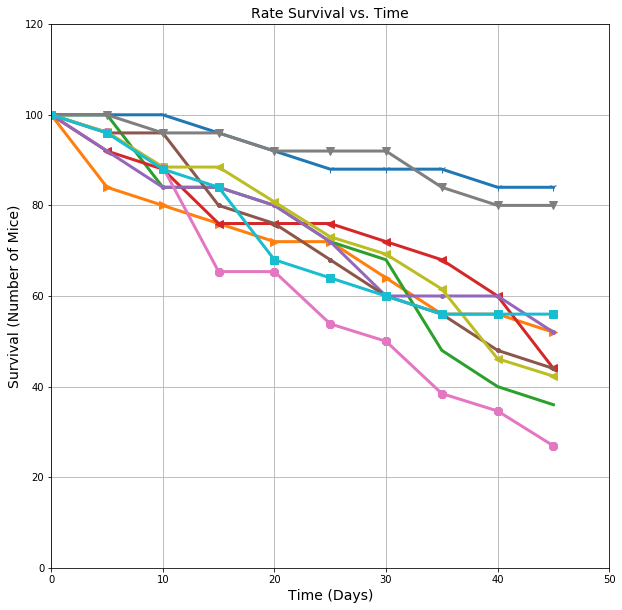

In [89]:
plt.figure(figsize=(10,10))
marker_choice = [".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s"]
for num in range(len(s_errors)):
    plt.errorbar(x_data_ct[num], y_survival_pct[num], 
                 marker = random.choice(marker_choice), 
                 markersize='8', elinewidth=2, linewidth = 3)
plt.grid(True)
plt.xlabel("Time (Days)", fontsize = 14)
plt.ylabel("Survival (Number of Mice)", fontsize = 14)
plt.title("Rate Survival vs. Time", fontsize = 14)
plt.xlim(0, 50, 5)
plt.ylim(0, 120, 5)
plt.show()

### Deliverable 4:  Create a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

In [157]:
x_data = [drug_conc_pvt_vol_mean[num].index.tolist() for num in drug_conc_pvt_vol_mean.columns]
y_means = [drug_conc_pvt_vol_mean[num].tolist() for num in drug_conc_pvt_vol_mean.columns]
y_vol_means_pct = [[(num_j/max(num_i) * 100) for num_j in num_i] for num_i in y_means]
vol_delta_pct = [((y_vol_means_pct[i][9] - y_vol_means_pct[i][0]) /y_vol_means_pct[i][0]) * 100 for i in range(10)]

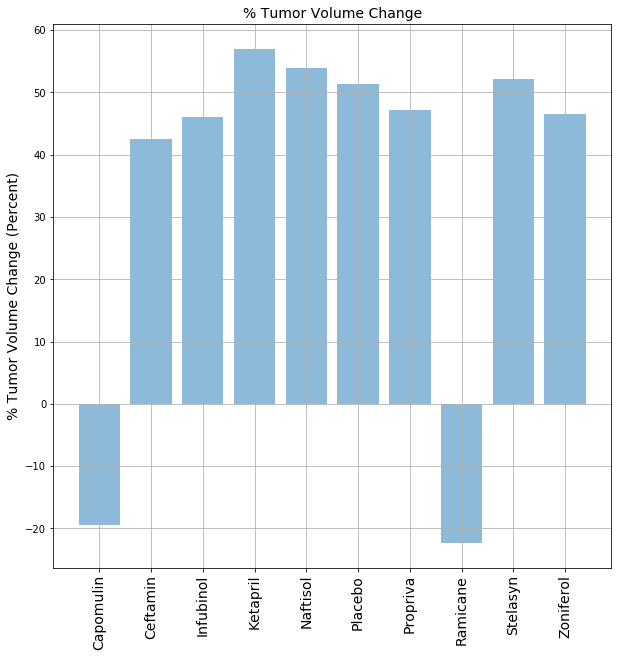

In [168]:
plt.figure(figsize=(10,10))
objects = drug_conc_pvt_vol_mean.columns.tolist()
y_position = np.arange(len(objects))
 
plt.bar(y_position, vol_delta_pct, alpha=0.5)
plt.xticks(y_position, objects, rotation='vertical', fontsize=14)
plt.ylabel('% Tumor Volume Change (Percent)', fontsize=14)
plt.title('% Tumor Volume Change', fontsize=14)
plt.grid(True)
plt.show()